Actividad Semanal 7

Regresiones y K means

Lázaro Lara Martínez. Matrícula A01793198

Ciencia y Analítica de datos.

Profesor Titular. Maria de la Paz Rico.

Profesor Tutor. Mtro. Mario Alberto Solano Saldaña

07/Noviembre/2022

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [185]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

# Ejercicio 1

Utiliza la base de datos de
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [186]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

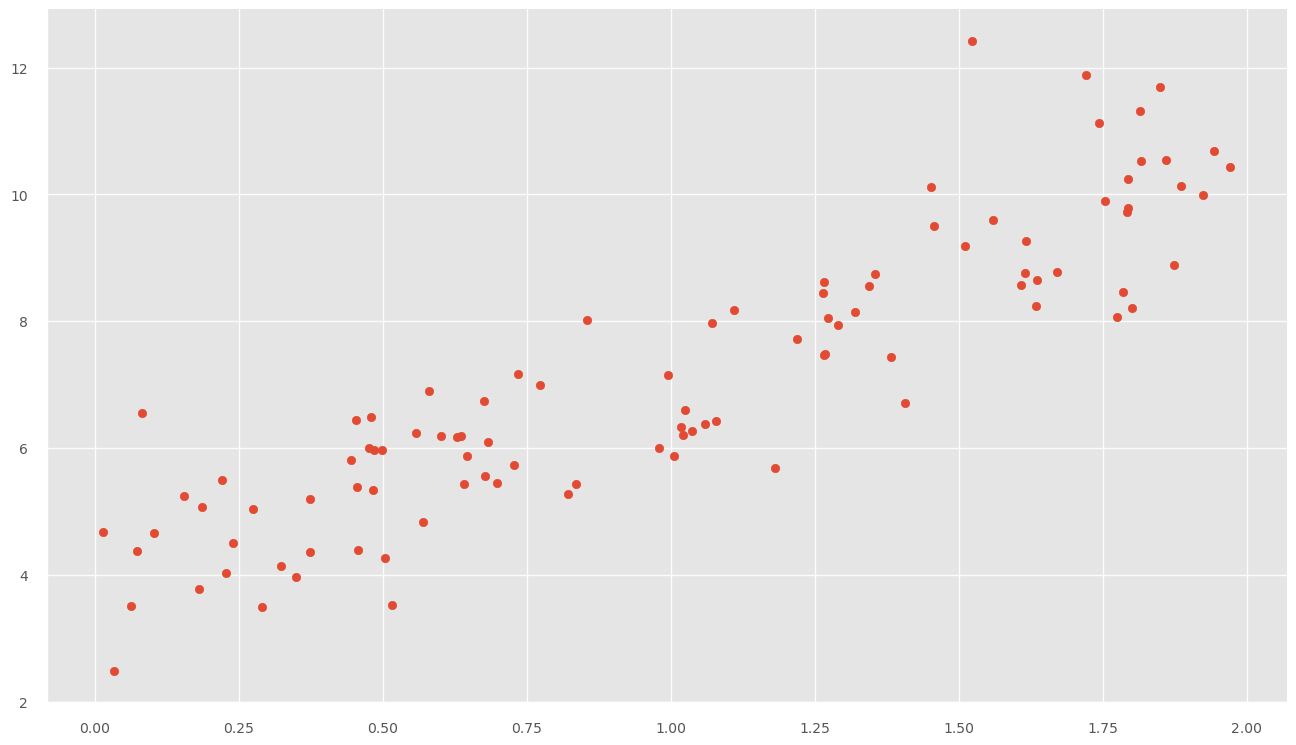

In [187]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [188]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [189]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [190]:
#X_fit[]

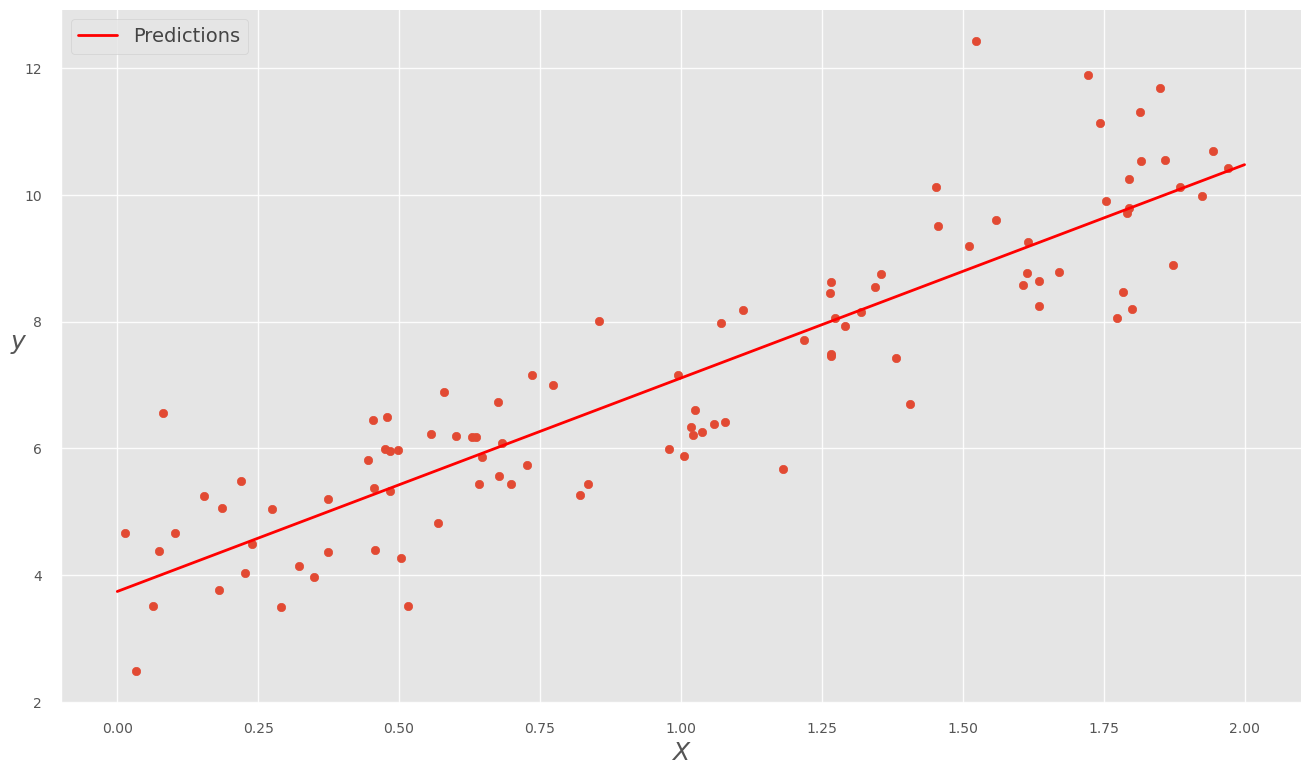

In [191]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [192]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [193]:
X_new.shape

(2, 1)

In [194]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [195]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [196]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [197]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

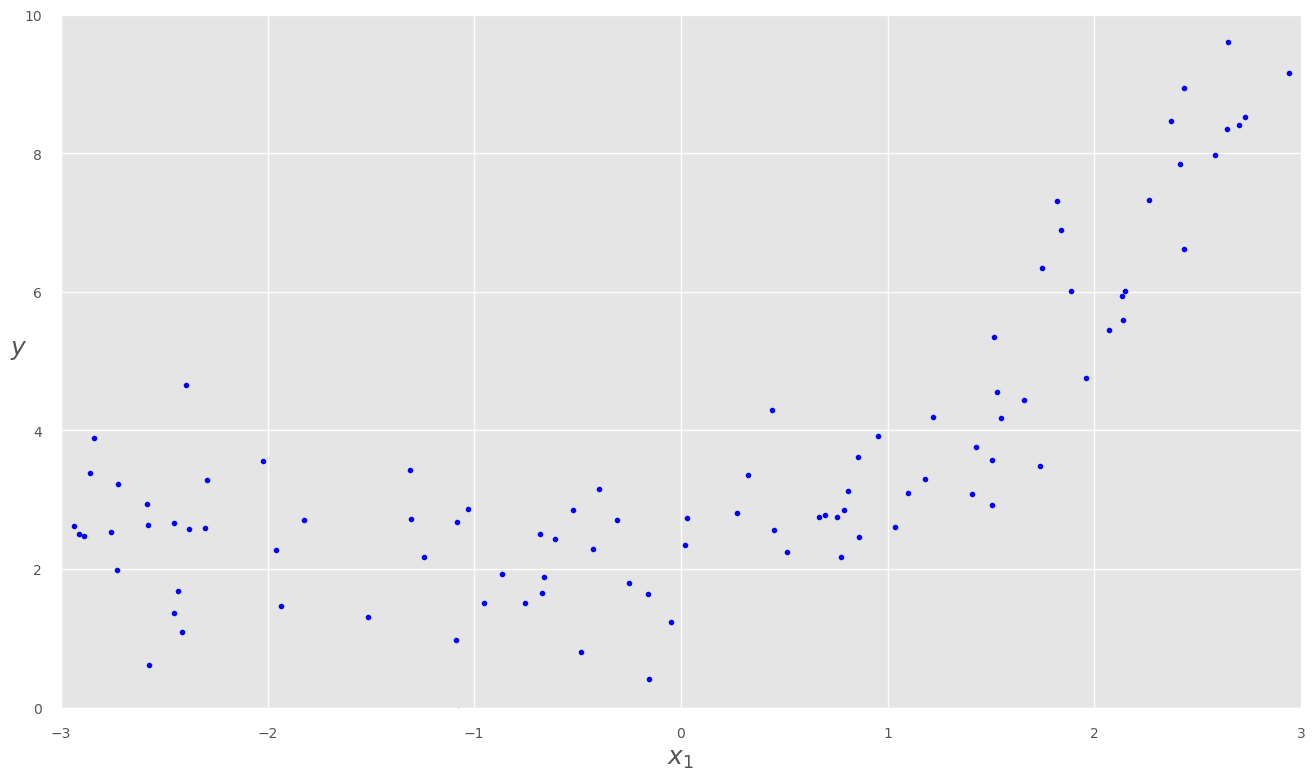

In [198]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [199]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [200]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [201]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [202]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [203]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [204]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

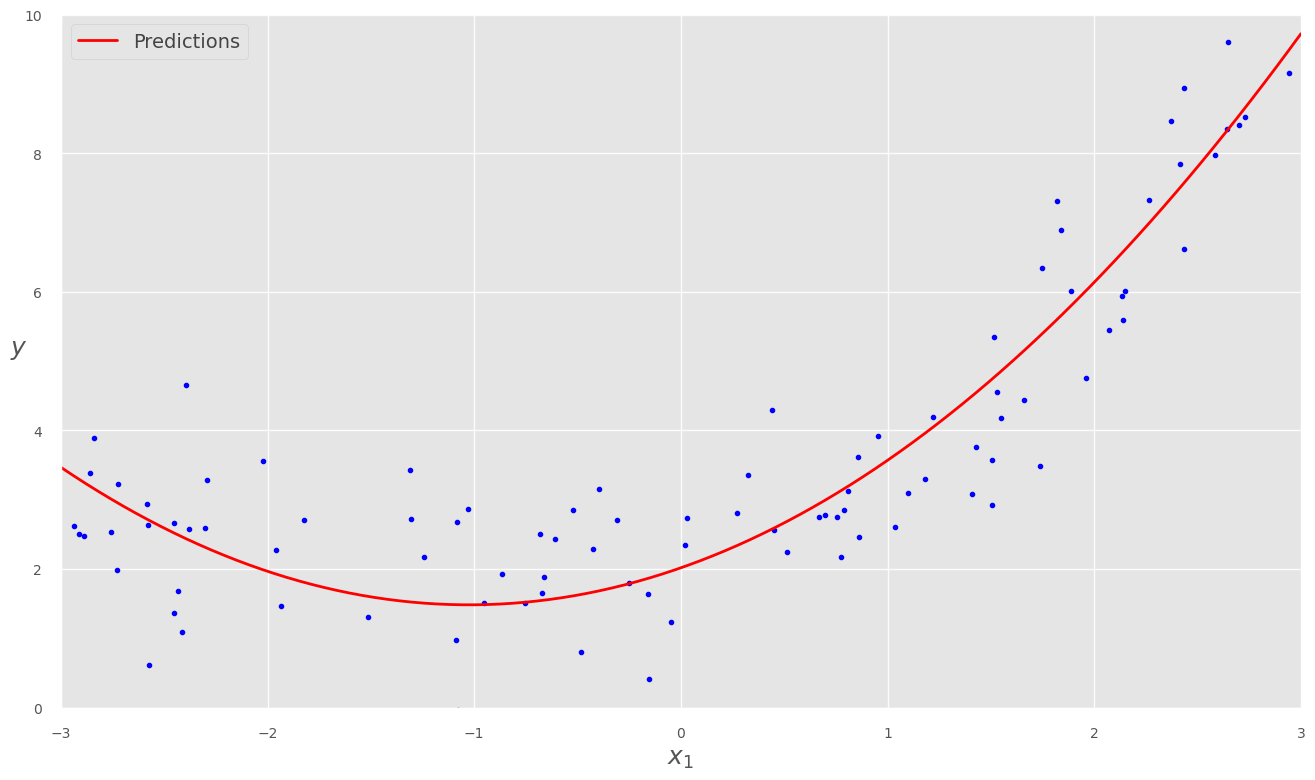

In [205]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [206]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [207]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [208]:
len(X)

1000

In [209]:

y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

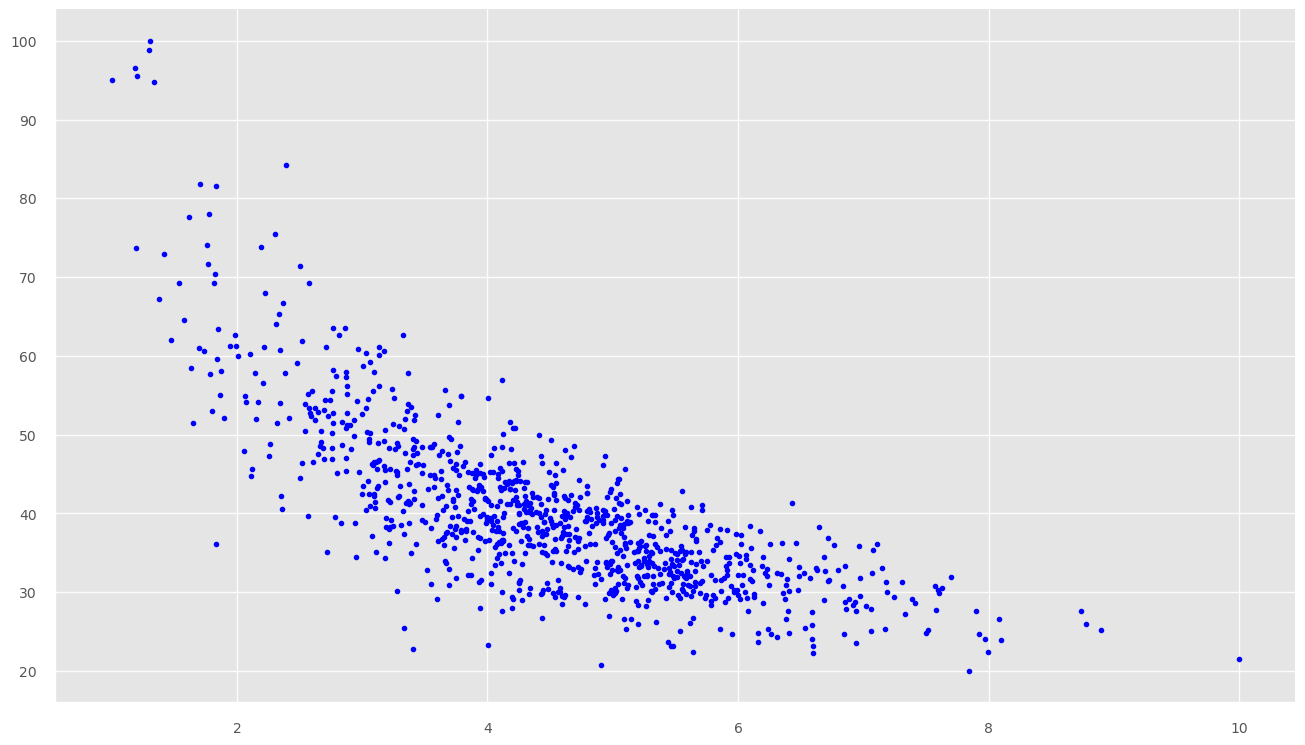

In [210]:
plt.plot(X,y,'b.')

Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [211]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 101)

Regresión Lineal.
Realiza la regresión lineal: modelo generado (ecuación), 

In [212]:
#lineal
from sklearn.linear_model import LinearRegression

ModeloLR = LinearRegression(fit_intercept=True)
ModeloLR=ModeloLR.fit(X_train, y_train)

In [213]:
ModeloLR.coef_, ModeloLR.intercept_

(array([-5.91602323]), 66.44764675174278)

$\hat{y} =  -5.91X + 66.44$

su visualización

/Users/lazaro/.conda/envs/IBMCours/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


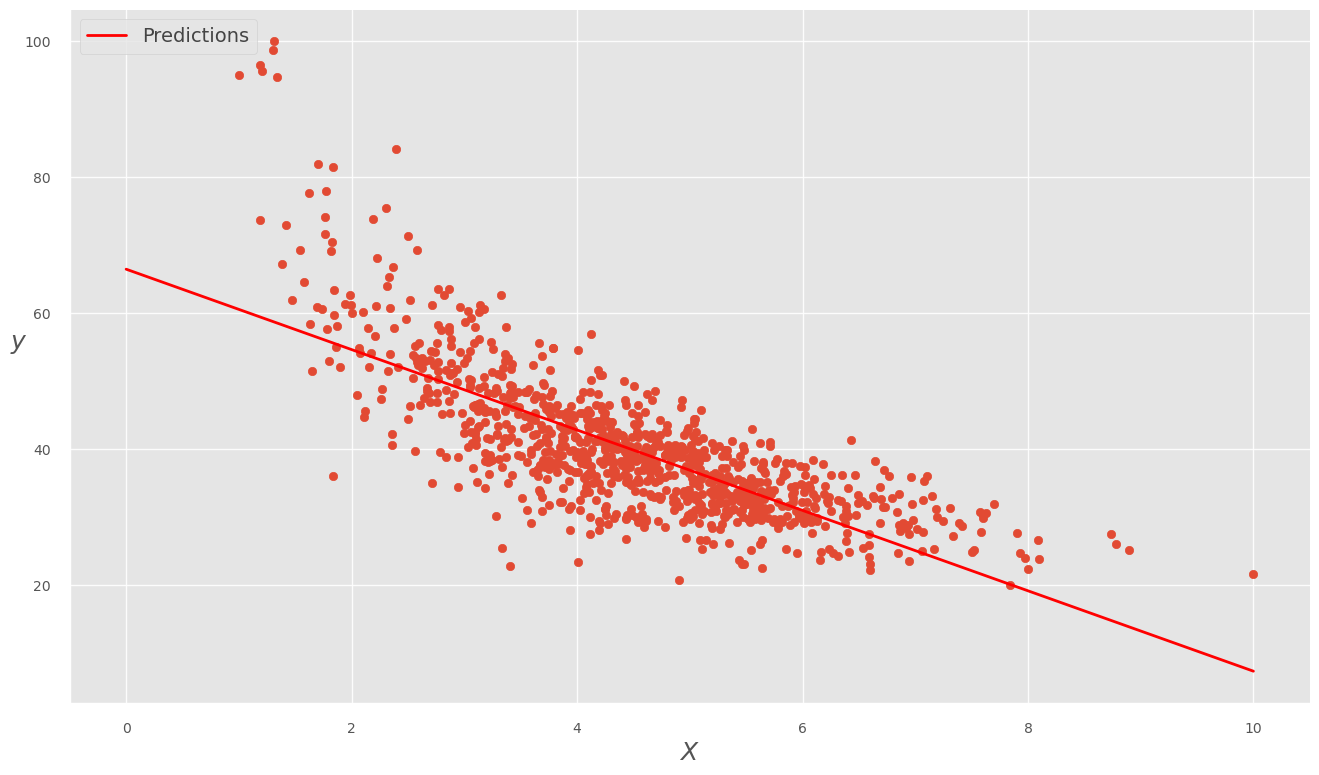

In [214]:
# construct best fit line
X_fit = np.linspace(0, 10, 100)
y_fit = ModeloLR.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

sus errores y r cuadrada.

In [215]:
import sklearn
from sklearn import metrics
from sklearn.metrics import r2_score

y_trainMean = np.mean(y_train)

y_predTrainLR = ModeloLR.predict(X_train)

SSE = (y_train-y_predTrainLR)**2
SSE=sum(SSE)

SST = (y_train-y_trainMean)**2
SST=sum(SST)

R2LRTrain = sklearn.metrics.r2_score(y_train, y_predTrainLR)

print("Results for Train results)")
print("sum of the square of errors=", SSE)
print("sum of the total error?", SST)
print("R2 Error", R2LRTrain)

Results for Train results)
sum of the square of errors= 39379.83830485658
sum of the total error? 91547.34455036442
R2 Error 0.5698418288561948


In [216]:
print('Error medio Absoluto MAE', metrics.mean_absolute_error(y_train, y_predTrainLR))
print('roor Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_predTrainLR)))
print('r2_score', r2_score(y_train, y_predTrainLR))

Error medio Absoluto MAE 4.888089732088765
roor Mean Squared Error:  6.806557245416021
r2_score 0.5698418288561948


In [217]:
y_trainMean = np.mean(y_train)

y_predTestLR = ModeloLR.predict(X_test)

SSE = (y_test-y_predTestLR)**2
SSE=sum(SSE)

SST = (y_test-y_trainMean)**2
SST=sum(SST)

R2LRTst = sklearn.metrics.r2_score(y_test, y_predTestLR)

print("Results for Test results")
print("sum of the square of errors =", SSE)
print("sum of the total error =", SST)
print("R2 Error", R2LRTst)

Results for Test results
sum of the square of errors = 7866.309259793896
sum of the total error = 20610.912083215255
R2 Error 0.6171440942171167


Regresión Múltiple Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [218]:
#polinomial

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_polyTst = poly_features.fit_transform(X_test)

In [219]:
ModeloLR2 = LinearRegression(fit_intercept=True)
ModeloLR2.fit(X_poly, y_train)
ModeloLR2.coef_, ModeloLR2.intercept_

(array([-5.35362652e+01,  1.20217474e+01, -1.26914661e+00,  4.97329144e-02]),
 130.6014949605702)

The model estimates:

$\hat{y} =  -53.53X +12.02X^2 -1.269X^3 +0497X^4 + 130.60$

/Users/lazaro/.conda/envs/IBMCours/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


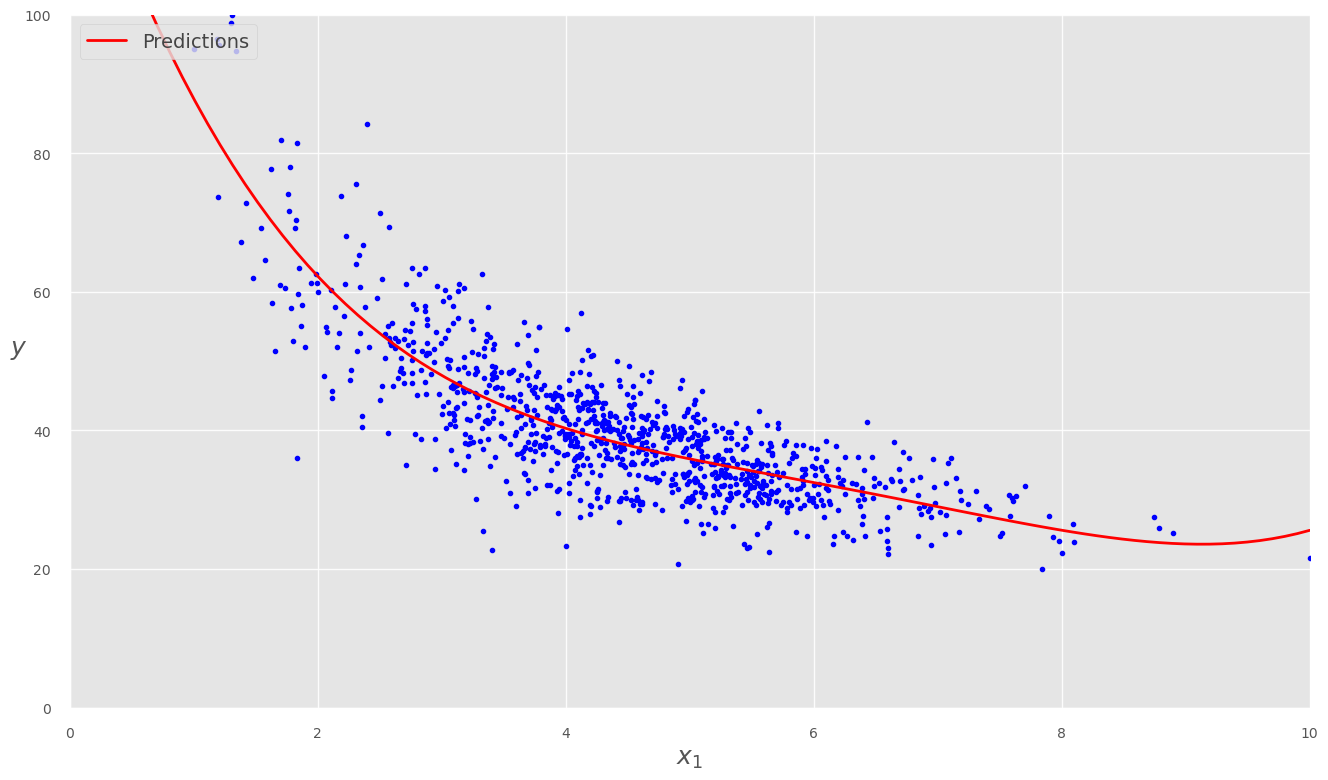

In [220]:
X_new2=np.linspace(0, 10, 100).reshape(100, 1)
X_new_poly2 = poly_features.transform(X_new2)
y_new2 = ModeloLR2.predict(X_new_poly2)
plt.plot(X, y, "b.")
plt.plot(X_new2, y_new2, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0,100]);

In [221]:
y_trainMean = np.mean(y_train)
y_predTrainPoly = ModeloLR2.predict(X_poly)

SSE = (y_train-y_predTrainPoly)**2
SSE=SSE.sum()

SST = (y_train-y_trainMean)**2
SST=SST.sum()


R2PolyTrain = sklearn.metrics.r2_score(y_train, y_predTrainPoly)
print("errors on training")
print("sum of the square of errors=", SSE)
print("sum of the total error_", SST)
print("R2 Error", R2PolyTrain)

errors on training
sum of the square of errors= 29595.14751455866
sum of the total error_ 91547.34455036433
R2 Error 0.6767230370261911


In [222]:
print('Error medio Absoluto MAE', metrics.mean_absolute_error(y_train, y_predTrainPoly))
print('roor Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_predTrainPoly)))
print('r2_score', r2_score(y_train, y_predTrainPoly))

Error medio Absoluto MAE 4.436743351981708
roor Mean Squared Error:  5.900662725945547
r2_score 0.6767230370261911


In [223]:
y_predTestPoly = ModeloLR2.predict(X_polyTst)

SSE = (y_test-y_predTestPoly)**2
SSE=SSE.sum()

SST = (y_test-y_trainMean)**2
SST=SST.sum()


R2PolyTst = sklearn.metrics.r2_score(y_test, y_predTestPoly)
print("errors on test")
print("sum of the square of errors=", SSE)
print("sum of the total error = ", SST)
print("R2 Error", R2PolyTst)

errors on test
sum of the square of errors= 4824.999893354483
sum of the total error =  20610.91208321526
R2 Error 0.7651656394931838


In [224]:
print('Error medio Absoluto MAE', metrics.mean_absolute_error(y_test, y_predTestPoly))
print('roor Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_predTestPoly)))
print('r2_score', r2_score(y_test, y_predTestPoly))

Error medio Absoluto MAE 4.466769722270131
roor Mean Squared Error:  5.671566446379391
r2_score 0.7651656394931838


Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [225]:
#Ridge
from sklearn.linear_model import  Lasso, Ridge

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_polyTst = poly_features.fit_transform(X_test)


ModeloRidge = Ridge(alpha=1)
ModeloRidge.fit(X_poly, y_train)
ModeloRidge.coef_, ModeloRidge.intercept_


(array([-2.59487430e+01,  3.05297390e+00, -7.88321826e-02, -5.29151596e-03]),
 101.90042336404503)

$\hat{y} =  -25.94X +3.0529X^2  -07.88x^3 -.00529x^4 + 101.90$

/Users/lazaro/.conda/envs/IBMCours/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


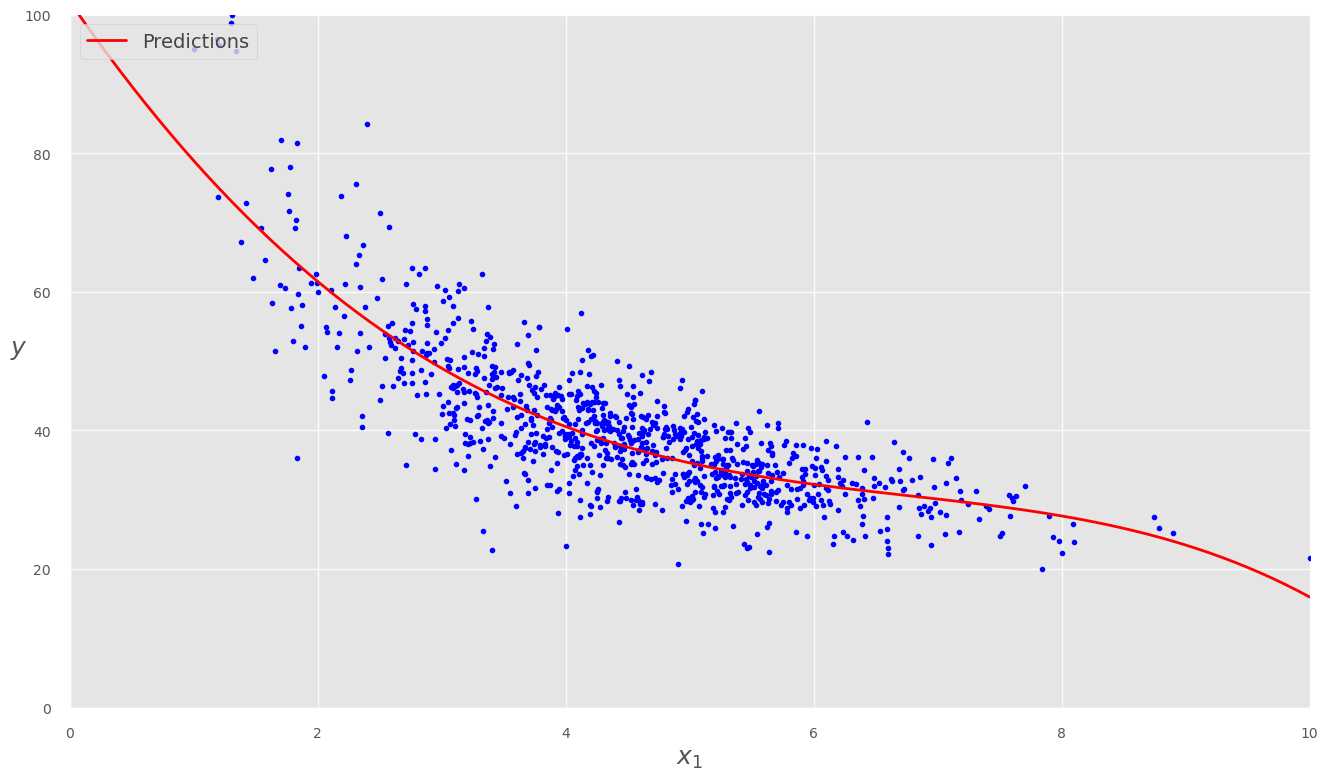

In [226]:
X_new_poly2 = poly_features.transform(X_new2)
y_new2 = ModeloRidge.predict(X_new_poly2)
plt.plot(X, y, "b.")
plt.plot(X_new2, y_new2, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0,100]);

In [227]:
y_trainMean = np.mean(y_train)
y_predTrainRidge = ModeloRidge.predict(X_poly)

SSE = (y_train-y_predTrainRidge)**2
SSE=SSE.sum()

SST = (y_train-y_trainMean)**2
SST=SST.sum()


R2RidgeTrain = sklearn.metrics.r2_score(y_train, y_predTrainRidge)
print("errors on training")
print("sum of the square of errors=", SSE)
print("sum of the total error_", SST)
print("R2 Error", R2RidgeTrain)

errors on training
sum of the square of errors= 30338.484012461726
sum of the total error_ 91547.34455036433
R2 Error 0.6686033422217816


In [228]:

y_predTestRidge = ModeloRidge.predict(X_polyTst)

SSE = (y_test-y_predTestRidge)**2
SSE=SSE.sum()

SST = (y_test-y_trainMean)**2
SST=SST.sum()


R2RidgeTst = sklearn.metrics.r2_score(y_test, y_predTestRidge)
print("errors on test")
print("sum of the square of errors=", SSE)
print("sum of the total error_", SST)
print("R2 Error", R2RidgeTst)

errors on test
sum of the square of errors= 5084.747696256081
sum of the total error_ 20610.91208321526
R2 Error 0.7525236269469329


In [229]:
#Lasso

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_polyTst = poly_features.fit_transform(X_test)


ModeloLasso = Lasso(alpha=1)
ModeloLasso.fit(X_poly, y_train)
ModeloLasso.coef_, ModeloLasso.intercept_


/Users/lazaro/.conda/envs/IBMCours/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.417e+03, tolerance: 9.155e+00
  model = cd_fast.enet_coordinate_descent(


(array([-0.        , -2.30288826,  0.27692471, -0.00729011]),
 63.25271426135318)

$\hat{y} =  -5.34X  + 63.89$

/Users/lazaro/.conda/envs/IBMCours/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


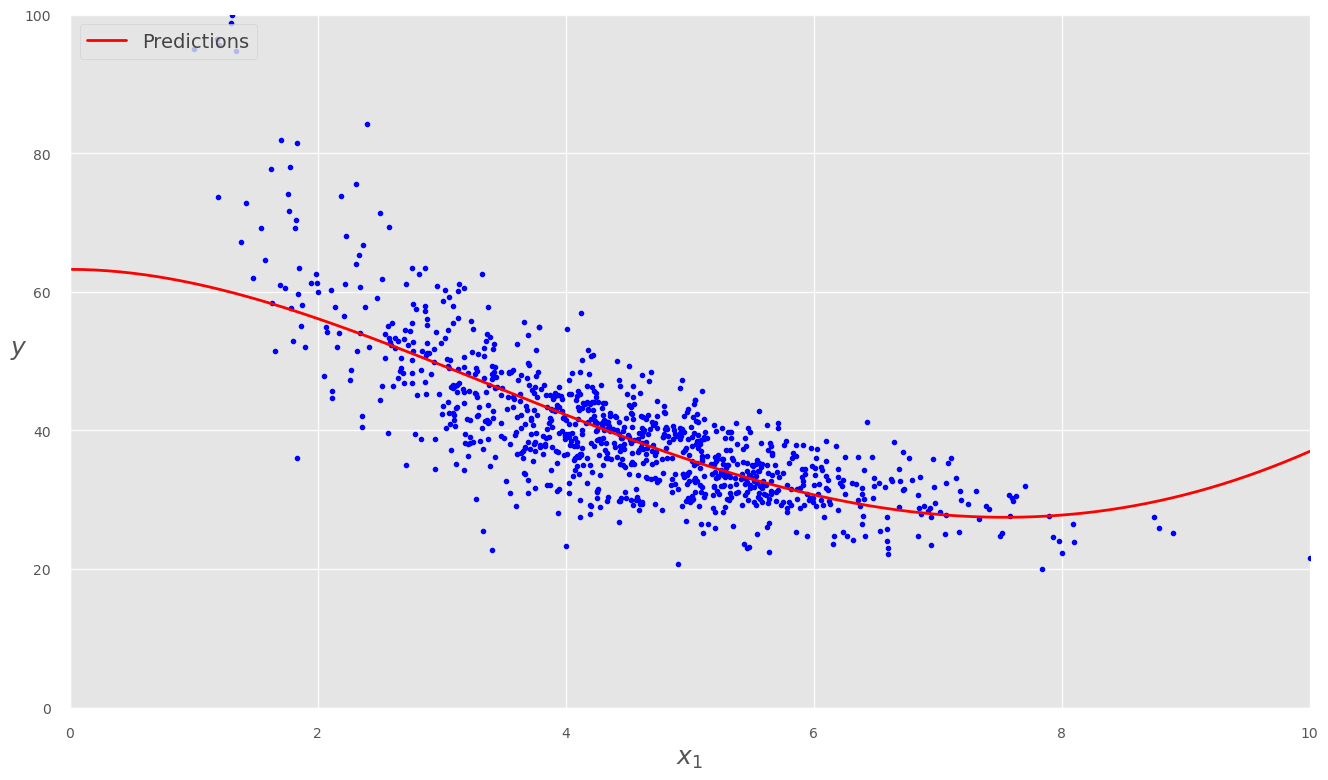

In [230]:
X_new_poly2 = poly_features.transform(X_new2)
y_new2 = ModeloLasso.predict(X_new_poly2)
plt.plot(X, y, "b.")
plt.plot(X_new2, y_new2, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0,100]);

In [231]:
y_trainMean = np.mean(y_train)
y_predTrainLasso = ModeloLasso.predict(X_poly)

SSE = (y_train-y_predTrainLasso)**2
SSE=SSE.sum()

SST = (y_train-y_trainMean)**2
SST=SST.sum()


R2LassoTrain = sklearn.metrics.r2_score(y_train, y_predTrainLasso)
print("errors on training")
print("sum of the square of errors=", SSE)
print("sum of the total error_", SST)
print("R2 Error", R2LassoTrain)

errors on training
sum of the square of errors= 36302.88145030516
sum of the total error_ 91547.34455036433
R2 Error 0.6034523816216941


In [232]:
y_predTestLasso = ModeloLasso.predict(X_polyTst)

SSE = (y_test-y_predTestLasso)**2
SSE=SSE.sum()

SST = (y_test-y_trainMean)**2
SST=SST.sum()


R2LassoTst = sklearn.metrics.r2_score(y_test, y_predTestLasso)
print("errors on test")
print("sum of the square of errors=", SSE)
print("sum of the total error_", SST)
print("R2 Error", R2LassoTst)

errors on test
sum of the square of errors= 7110.75657299681
sum of the total error_ 20610.91208321526
R2 Error 0.6539170964875574


In [233]:
def mi_MAE(y_real, y_pred):
  MAE_val=np.abs(y_real-y_pred)
  MAE_val=np.mean(MAE_val)
  return MAE_val

MAE_LRTrain=mi_MAE(y_train,y_predTrainLR)
MAE_PolTrain=mi_MAE(y_train,y_predTrainPoly)
MAE_RidgeTrain=mi_MAE(y_train,y_predTrainRidge)
MAE_LassoTrain=mi_MAE(y_train,y_predTrainLasso)

print(MAE_LRTrain)
print(MAE_PolTrain)
print(MAE_RidgeTrain)
print(MAE_LassoTrain)

4.888089732088765
4.436743351981708
4.458396446851129
4.658303474197212


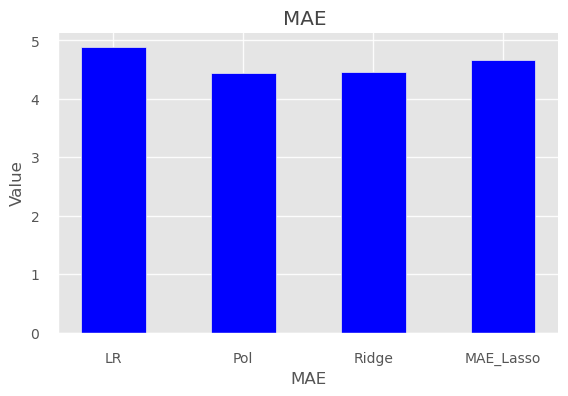

In [234]:
import matplotlib.pyplot as plt

data = {'LR':MAE_LRTrain, 'Pol': MAE_PolTrain, 'Ridge': MAE_RidgeTrain,
        'MAE_Lasso':MAE_LassoTrain}


Model = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (5, 3))
MaeGraph = fig.add_axes([0,0,1,1])
 
MaeGraph.bar(Model,values, color ='b', width =.5)

plt.xlabel("MAE")
plt.ylabel("Value")
plt.title("MAE ")
plt.show()

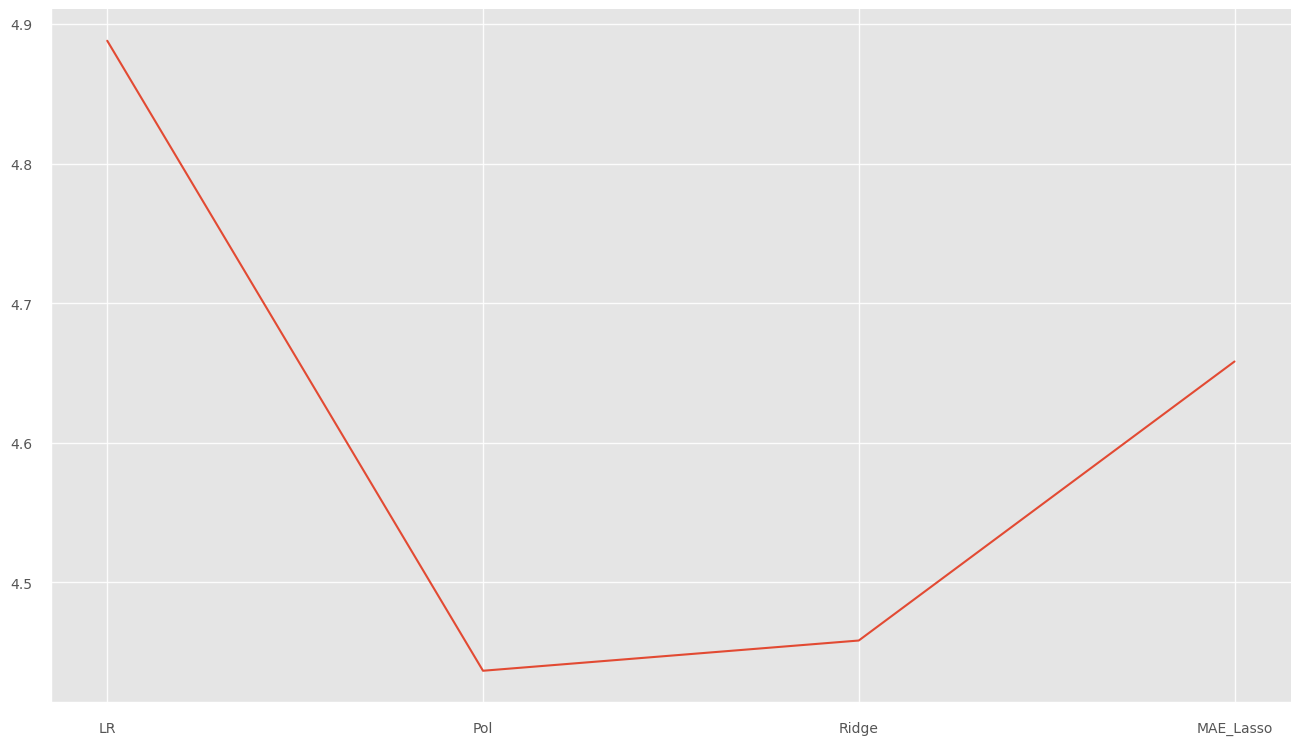

In [235]:
plt.plot(Model,values)

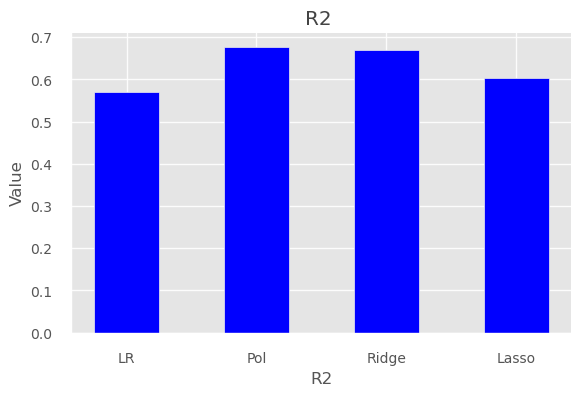

In [236]:
data2 = {'LR':R2LRTrain, 'Pol': R2PolyTrain, 'Ridge': R2RidgeTrain,
        'Lasso':R2LassoTrain}

Model2 = list(data2.keys())
values2 = list(data2.values())

fig = plt.figure(figsize = (5, 3))
MaeGraph = fig.add_axes([0,0,1,1])
 
MaeGraph.bar(Model2,values2, color ='b', width =.5)

plt.xlabel("R2")
plt.ylabel("Value")
plt.title("R2 ")
plt.show()

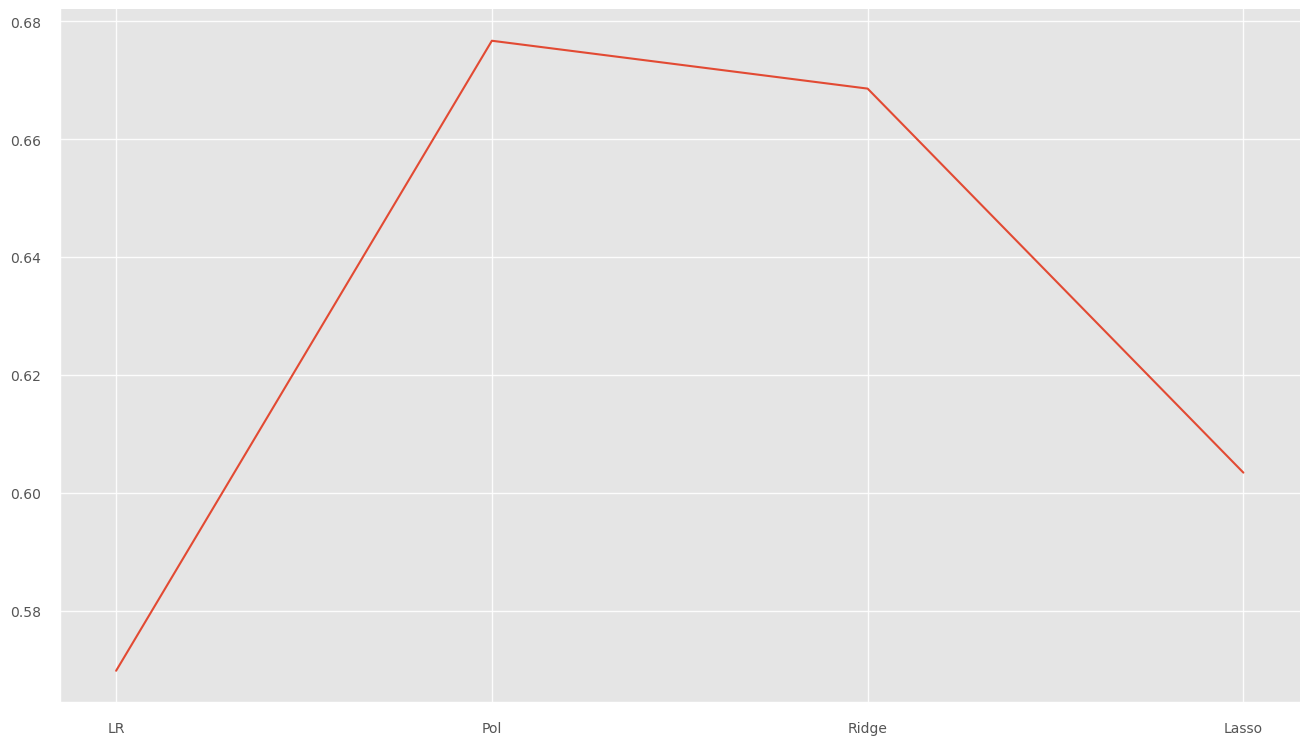

In [237]:
plt.plot(Model2,values2)

Explica tus resultados, que método conviene más a la empresa, ¿por que?

    El modelo con peor desempeño es el lineal, ya que los datos no siguen la recta, es necesario un modelo polinomial que se ajuste mejor.
    El método polinomial de grado 4 es el que da mejor resultado sin tener sobre entrenamiento, no tan complejo como Ridge y Lasso.

¿que porcentajes de entrenamiento y evaluación?

    Se uso el 90% para entrenamiento y el resto para evaluación, esto se podrìa ajustar al ver los resultados de entrenamiento vs pruebas para ir obteniendo mejores resultados.

¿que error tienes?
En entrenamiento

    MAE 4.4367433519817085

    Mean Squared Error:  5.900662725945548

    r2_score 0.676723037026191


En prueba

    MAE 4.466769722270131

    Mean Squared Error:  5.671566446379391

    r2_score 0.7651656394931838

¿es bueno?, ¿cómo lo sabes?

    Se puede considerar bueno a partir de un $R^2 Score$ de 0.6, por lo tanto si es un buen modelo.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [238]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20773,7304301231,20140617T000000,345000.0,3,2.50,1680,2229,2.0,0,0,...,7,1680,0,2007,0,98155,47.7484,-122.322,1230,9300
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21529,2487200490,20140623T000000,670000.0,3,2.50,3310,5300,2.0,0,2,...,8,2440,870,2008,0,98136,47.5178,-122.389,2140,7500
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19948,293070090,20140711T000000,859990.0,4,2.75,3520,5500,2.0,0,0,...,9,3520,0,2014,0,98074,47.6181,-122.056,3340,5500


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [240]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [241]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


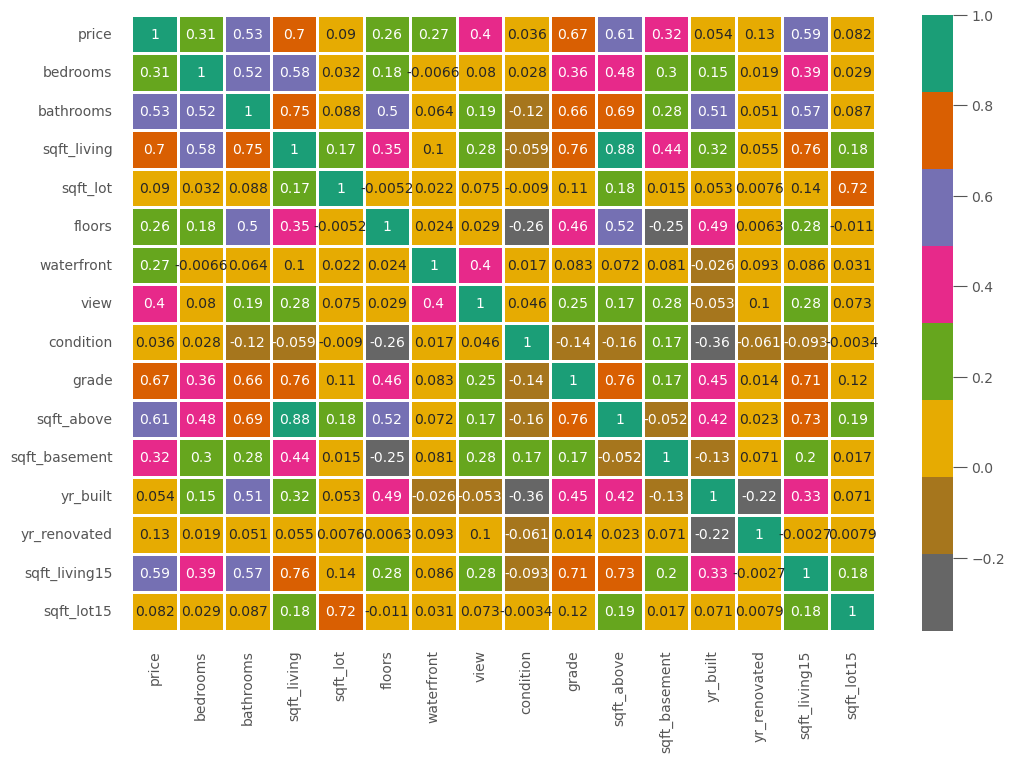

In [242]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [243]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [244]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [245]:
#tu codigo aquí

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [246]:
ModeloLR = LinearRegression(fit_intercept=True)
ModeloLR=ModeloLR.fit(X_train, y_train)
ModeloLR.coef_, ModeloLR.intercept_

(array([[-0.09808715,  0.08766871,  0.20426281,  0.0019498 ,  0.04692493,
          0.13295382,  0.08707801,  0.03799052,  0.38665787,  0.16969088,
          0.10626832, -0.2864496 ,  0.01470207,  0.05466431, -0.0412092 ]]),
 array([4.60255147e-16]))

$\hat{y} =  -38200x1 +41466x2 +107.99x3 + 0.0171x4 +31691x5 + 552691x6 + 412493x7 +21222x8 +119493x9 +47.77x10 60.21x11 -3550x12 +13.26x13 +29x14 -.5481x15 +6151359$

In [247]:
y_trainMean = np.mean(y_train)

y_predLRTrain = ModeloLR.predict(X_train)

In [248]:
SSE = (y_train-y_predLRTrain)**2
SSE = SSE.sum()


SST = (y_train-y_trainMean)**2
SST = SST.sum()
R2LRTrain = sklearn.metrics.r2_score(y_train, y_predLRTrain)

In [249]:
print("sum of the square of errors =", SSE)
print("sum of the total error =", SST)
print("R2 Error", R2LRTrain)

sum of the square of errors = 6751.05958998938
sum of the total error = 19451.0
R2 Error 0.6529196653133834


In [250]:
print('Error medio Absoluto MAE', metrics.mean_absolute_error(y_train, y_predLRTrain))
print('Error Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_predLRTrain)))
print('r2_score', r2_score(y_train, y_predLRTrain))

LRMAE=metrics.mean_absolute_error(y_train, y_predLRTrain)
LREMSE=np.sqrt(metrics.mean_squared_error(y_train, y_predLRTrain))
LRR2=r2_score(y_train, y_predLRTrain)

Error medio Absoluto MAE 0.38298371095605255
Error Mean Squared Error:  0.589135243120471
r2_score 0.6529196653133834


In [251]:
y_predLRTest = ModeloLR.predict(X_test)
SSE = (y_test-y_predLRTest)**2
SSE = SSE.sum()


SST = (y_test-y_trainMean)**2
SST = SST.sum()
R2LRTest = sklearn.metrics.r2_score(y_test, y_predLRTest)

In [252]:
print("sum of the square of errors =", SSE)
print("sum of the total error =", SST)
print("R2 Error", R2LRTest)

sum of the square of errors = 723.1091962334369
sum of the total error = 2162.0
R2 Error 0.6655369120104362


Regresión Múltiple Polinomial.
Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [253]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_polyTst = poly_features.fit_transform(X_test)


In [254]:
ModeloLR2 = LinearRegression(fit_intercept=True)
ModeloLR2.fit(X_poly, y_train)
ModeloLR2.coef_, ModeloLR2.intercept_

(array([[-4.93527980e+06, -6.02246094e+01,  7.50258984e+01, ...,
         -1.19145394e-02,  5.46319410e-04,  1.52316783e-03]]),
 array([-4189.62554023]))

In [255]:
y_predPolyTrain = ModeloLR2.predict(X_poly)


SSE = (y_train-y_predPolyTrain)**2
SSE = SSE.sum()

SST = (y_train-y_trainMean)**2
SST= SST.sum()

R2PolyTrain = sklearn.metrics.r2_score(y_train, y_predPolyTrain)

print("sum of the square of errors =", SSE)
print("sum of the total error = ", SST)
print("R2 Error", R2PolyTrain)

sum of the square of errors = 2781.1694997583786
sum of the total error =  19451.0
R2 Error 0.8570166315480757


In [256]:
print('Error medio Absoluto MAE', metrics.mean_absolute_error(y_train, y_predPolyTrain))
print('E Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_predPolyTrain)))
print('r2_score', r2_score(y_train, y_predPolyTrain))

PRMAE = metrics.mean_absolute_error(y_train, y_predPolyTrain)
PRMS = np.sqrt(metrics.mean_squared_error(y_train, y_predPolyTrain))
PRR2 = r2_score(y_train, y_predPolyTrain)

Error medio Absoluto MAE 0.2709544198104501
E Mean Squared Error:  0.37813141690677365
r2_score 0.8570166315480757


In [257]:
y_predPolyTest = ModeloLR2.predict(X_polyTst)


SSE = (y_test-y_predPolyTest)**2
SSE = SSE.sum()

SST = (y_test-y_trainMean)**2
SST= SST.sum()

R2PolyTest = sklearn.metrics.r2_score(y_test, y_predPolyTest)

print("sum of the square of errors =", SSE)
print("sum of the total error = ", SST)
print("R2 Error", R2PolyTest)

sum of the square of errors = 2.964088018776412e+17
sum of the total error =  2162.0
R2 Error -137099353319907.06


In [258]:
print('Error medio Absoluto MAE', metrics.mean_absolute_error(y_test, y_predPolyTest))
print('E Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_predPolyTest)))
print('r2_score', r2_score(y_test, y_predPolyTest))

Error medio Absoluto MAE 1233353.6317834577
E Mean Squared Error:  11708943.3050087
r2_score -137099353319907.06


Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

In [259]:
#Ridge
from sklearn.linear_model import  Lasso, Ridge

poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_polyTst = poly_features.fit_transform(X_test)


ModeloRidge1 = Ridge(alpha=1)
ModeloRidge1.fit(X_poly, y_train)
ModeloRidge1.coef_, ModeloRidge1.intercept_

(array([[-0.03860349,  0.08435466,  0.04768302, ..., -0.01163069,
          0.00368973,  0.00165457]]),
 array([-0.13694403]))

In [260]:
y_trainMean = np.mean(y_train)

y_predRidgeTrain = ModeloRidge1.predict(X_poly)

SSE = (y_train-y_predRidgeTrain)**2
SSE=SSE.sum()

SST = (y_train-y_trainMean)**2
SST=SST.sum()


R2RidgeTrain = sklearn.metrics.r2_score(y_train, y_predRidgeTrain)

print("sum of the square of errors =", SSE)
print("sum of the total error =", SST)
print("R2 Error", R2RidgeTrain)

sum of the square of errors = 2814.492393974533
sum of the total error = 19451.0
R2 Error 0.8553034602861276


In [261]:
print('Error medio Absoluto MAE', metrics.mean_absolute_error(y_train, y_predRidgeTrain))
print('roor Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_predRidgeTrain)))
print('r2_score', r2_score(y_train, y_predRidgeTrain))

RDMAE= metrics.mean_absolute_error(y_train, y_predRidgeTrain)
RDMS= np.sqrt(metrics.mean_squared_error(y_train, y_predRidgeTrain))
RDR2=r2_score(y_train, y_predRidgeTrain)

Error medio Absoluto MAE 0.27315955114682733
roor Mean Squared Error:  0.38038998371917265
r2_score 0.8553034602861276


In [262]:
y_predRidgeTst = ModeloRidge1.predict(X_polyTst)

SSE = (y_test-y_predRidgeTst)**2
SSE=SSE.sum()

SST = (y_test-y_trainMean)**2
SST=SST.sum()


R2RidgeTest = sklearn.metrics.r2_score(y_test, y_predRidgeTst)

print("sum of the square of errors =", SSE)
print("sum of the total error =", SST)
print("R2 Error", R2RidgeTest)

sum of the square of errors = 66662.25373671192
sum of the total error = 2162.0
R2 Error -29.833604873594783


Lasso

In [263]:
X = df[features]
y = df[label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

In [264]:
#Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

#InputPipeline=[('scale', StandardScaler()),PolynomialFeatures(degree=2),('Lasso',Lasso(alpha=1,max_iter=2000))]
#InputPipeline=[('scale', StandardScaler()),PolynomialFeatures(degree=2),('model',LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000, C=1., random_state=1))]

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_train)
X_polyTst = poly_features.fit_transform(X_test)


#pipe=Pipeline(InputPipeline)

#pipe.train(X_poly, y_train)
#pipe.coef_, pipe.intercept_



In [265]:
ModeloLasso1 = Lasso(alpha=1, max_iter=10000, tol=.1)
ModeloLasso1.fit(X_poly, y_train)
ModeloLasso1.coef_, ModeloLasso1.intercept_

/Users/lazaro/.conda/envs/IBMCours/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.303e+14, tolerance: 2.572e+14
  model = cd_fast.enet_coordinate_descent(


(array([ 6.46503424e+05, -1.81327030e+05,  4.33835112e+02, -1.63965310e+01,
        -4.80069373e+05, -2.39493053e+06,  2.57703271e+05,  7.51353981e+05,
         6.18635874e+05, -3.76829709e+02, -3.88268304e+02, -1.43891359e+04,
        -1.17750999e+03,  1.06463777e+03, -1.29569422e+01,  1.05338936e+03,
         4.05925160e+03, -2.52874897e+01, -1.03614193e-01,  8.70969481e+03,
        -2.13883568e+04, -5.99533479e+02, -3.16216745e+03, -5.65477748e+03,
         1.16298289e+01,  1.92020429e-01, -3.25511282e+02, -4.66278521e+00,
         1.95166971e+01,  2.41384198e-01, -4.70307304e+03,  6.25064798e+01,
        -1.15743821e-01, -2.13866330e+04,  4.72596224e+04,  5.85500063e+03,
        -1.12609598e+04,  2.27267512e+04, -2.95195575e+01, -4.82443456e+01,
         6.02654797e+01, -2.54441547e+01, -3.13529527e+01,  1.09185686e-01,
        -2.77648219e-02,  9.42116967e-04, -8.81967855e+00, -2.47827584e+02,
         8.45320110e+01, -2.55983357e+01,  2.93909666e+01, -6.80502364e-02,
        -7.1

In [266]:
y_predLassoTrain = ModeloLasso1.predict(X_poly)

print('Error medio Absoluto MAE', metrics.mean_absolute_error(y_train, y_predLassoTrain))
print('roor Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_train, y_predLassoTrain)))
print('r2_score', r2_score(y_train, y_predLassoTrain))

LSMAE=metrics.mean_absolute_error(y_train, y_predLassoTrain)
LSMS= np.sqrt(metrics.mean_squared_error(y_train, y_predLassoTrain))
LSR2= r2_score(y_train, y_predLassoTrain)

Error medio Absoluto MAE 123742.19751625831
roor Mean Squared Error:  184251.9147306148
r2_score 0.7432717522747291


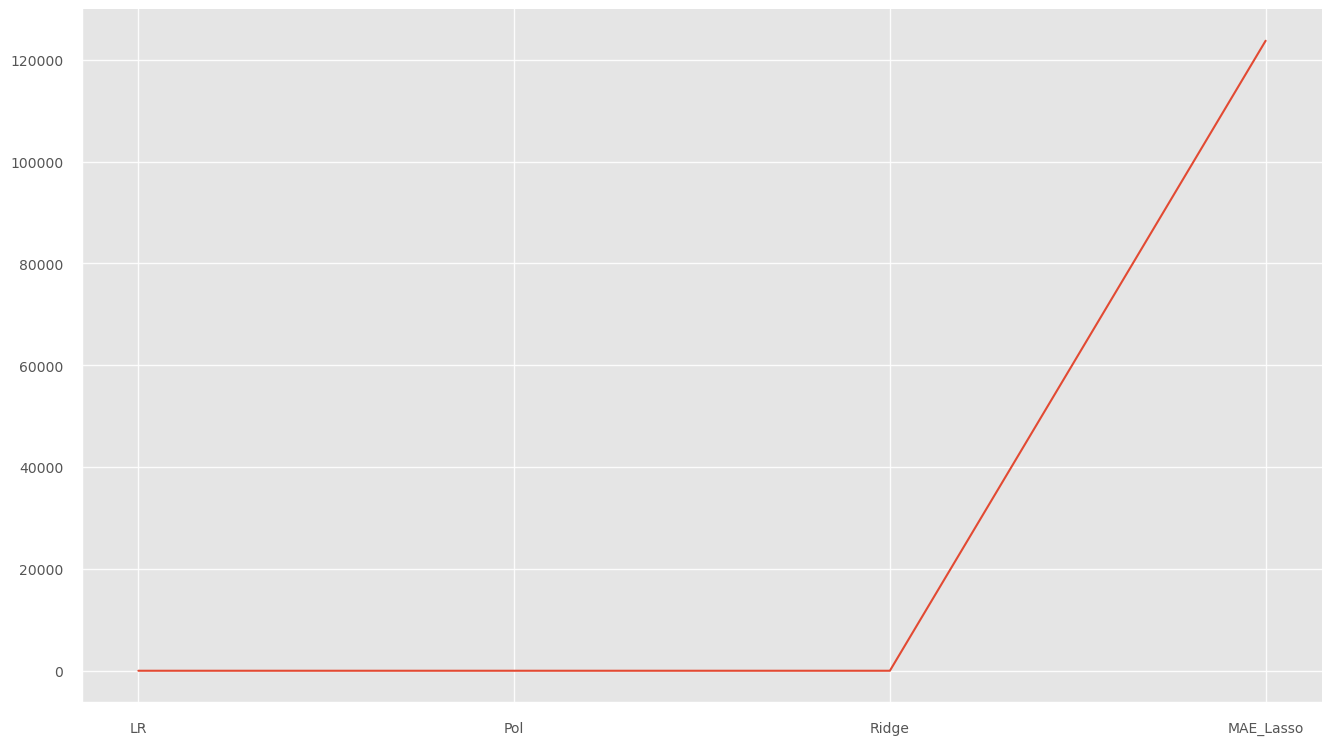

In [267]:
data3 = {'LR':LRMAE, 'Pol': PRMAE, 'Ridge': RDMAE,
        'MAE_Lasso':LSMAE}


Model3 = list(data3.keys())
values3 = list(data3.values())

plt.plot(Model3,values3)

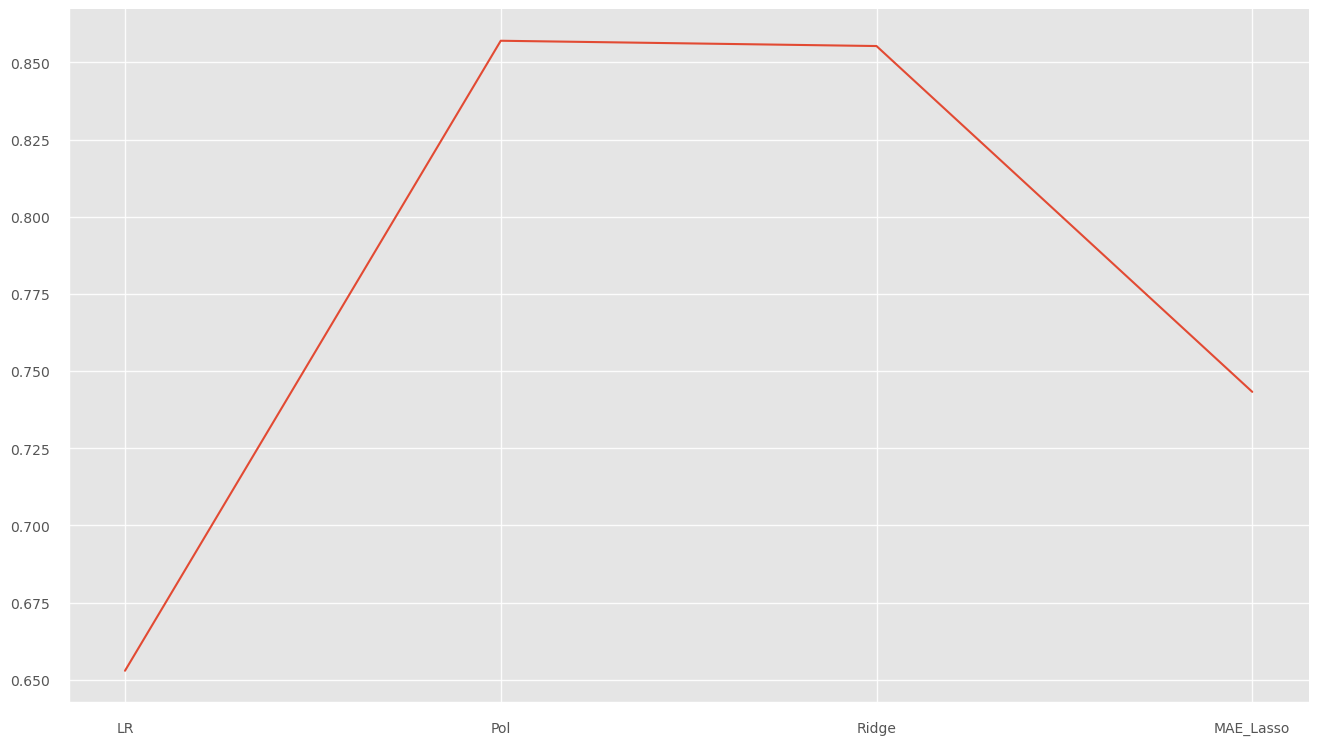

In [135]:
data4 = {'LR':LRR2, 'Pol': PRR2, 'Ridge': RDR2,
        'MAE_Lasso':LSR2}


Model4 = list(data4.keys())
values4 = list(data4.values())

plt.plot(Model4,values4)

Explica tus resultados, que método conviene más a la empresa, ¿por que?, 

    El modelo Ridge con un polinomio grado 4 es el mejor.

¿Que porcentajes de entrenamiento y evaluación?
    Se uso el 90% para entrenamiento y 10% en validación.

¿que error tienes?

    Error medio Absoluto MAE 0.2731595511398793

    Mean Squared Error:  0.38038998371929256

    r2_score 0.8553034602860363

¿es bueno?, ¿cómo lo sabes?

Si es considerado un buen modelo, tiene bajo porcentaje d error, el R2 Score de .85 es consiferado muy buena.

Este notebook se basa en información de target


![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [138]:
pip install tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [139]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [161]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [162]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [143]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

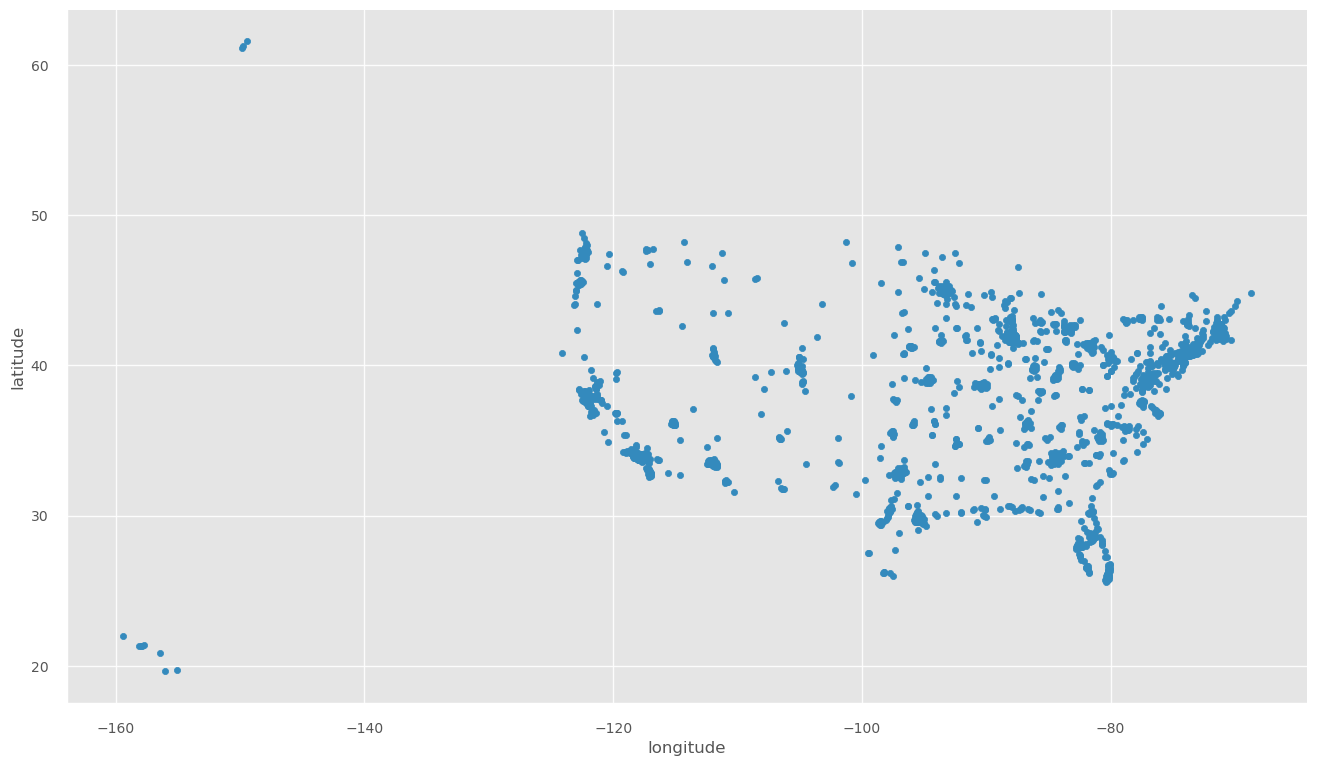

In [144]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [145]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [ ]:
pip install geopandas

In [ ]:
pip install qeds

In [146]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [147]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [148]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [149]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,889953.0,Oceania,Fiji,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,58005463.0,Africa,Tanzania,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253.0,Africa,W. Sahara,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,37589262.0,North America,Canada,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,328239523.0,North America,United States of America,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [150]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

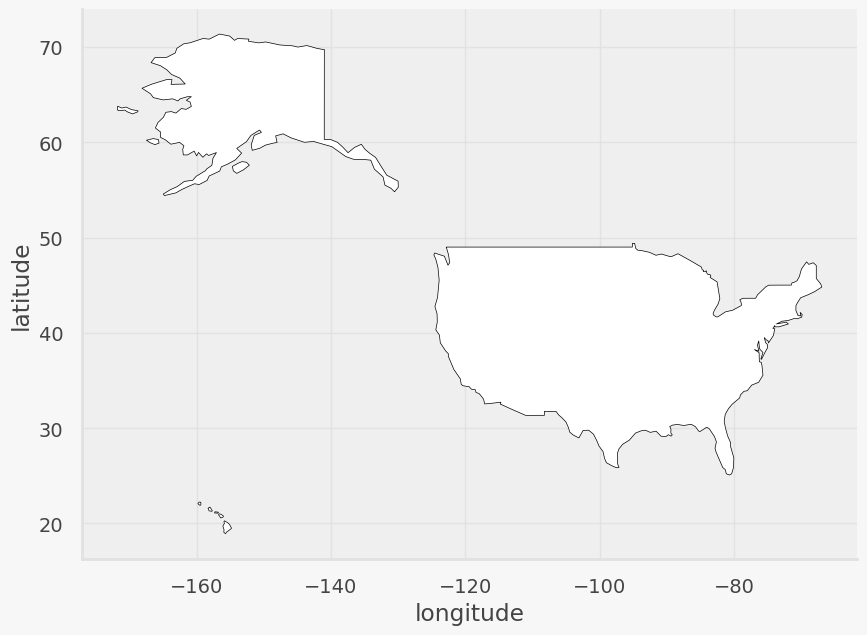

In [151]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

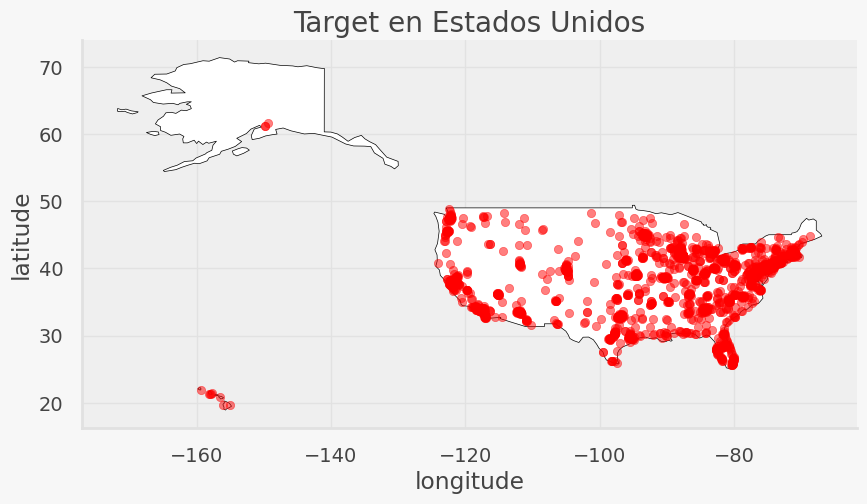

In [152]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [303]:
#tu codigo aquí
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

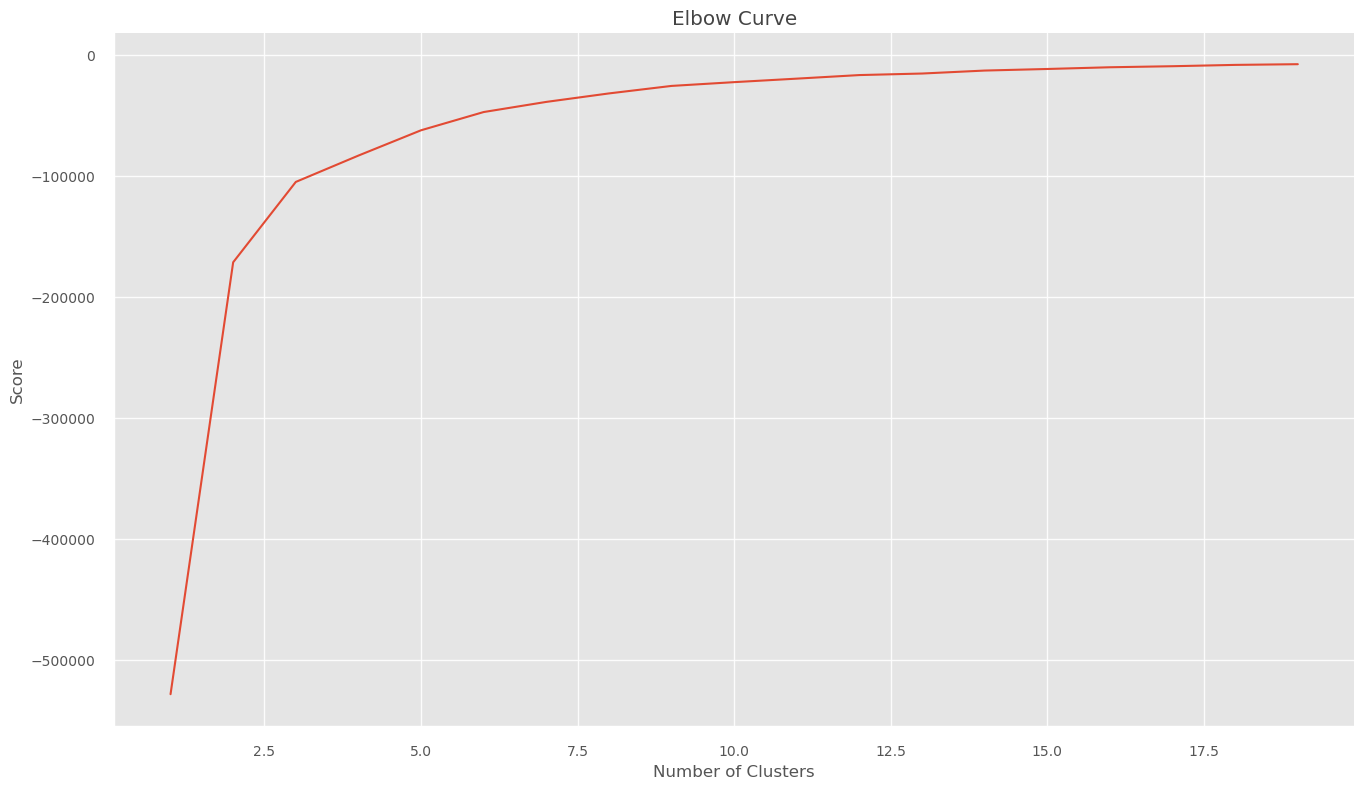

In [304]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(latlong).score(latlong) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [305]:

kmeans = KMeans(n_clusters=11).fit(latlong)
centroids = kmeans.cluster_centers_
print(centroids)


[[  41.29717588  -86.14997118]
 [  35.41108603 -118.92569852]
 [  43.1137202   -93.88942837]
 [  40.55199108  -75.07425605]
 [  27.73898276  -81.35701207]
 [  31.87654161  -96.13928996]
 [  46.25476682 -121.15506338]
 [  20.94542771 -157.31225085]
 [  37.2213025  -108.58490525]
 [  34.40976558  -83.45410842]
 [  61.31264473 -149.6767927 ]]


<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

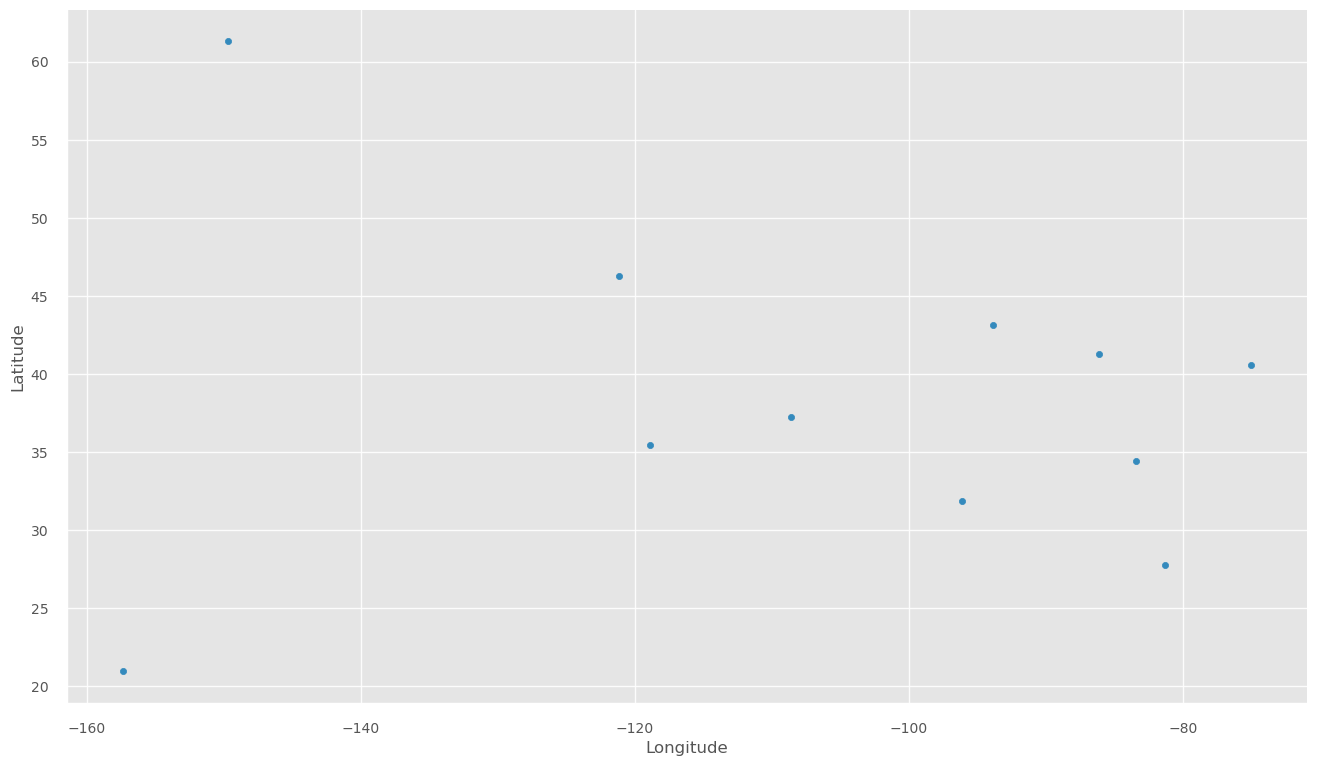

In [306]:
DistLat=centroids[:,0]
DistLong=centroids[:,1]

newCoordinates={'Latitude':DistLat,'Longitude':DistLong}

newCoordinates=pd.DataFrame(newCoordinates)
newCoordinates.plot.scatter( "Longitude","Latitude")



In [307]:
print(newCoordinates.Latitude)

0     41.297176
1     35.411086
2     43.113720
3     40.551991
4     27.738983
5     31.876542
6     46.254767
7     20.945428
8     37.221302
9     34.409766
10    61.312645
Name: Latitude, dtype: float64


In [308]:
df2=pd.DataFrame()
df2["Coordinates"] = list(zip(newCoordinates.Longitude, newCoordinates.Latitude))
df2["Coordinates"] = df2["Coordinates"].apply(Point)
df2.head()

,Coordinates
0,POINT (-86.14997117572815 41.29717588381877)
1,POINT (-118.9256985178899 35.41108603027523)
2,POINT (-93.889428375 43.11372019736842)
3,POINT (-75.07425604709977 40.551991076566125)
4,POINT (-81.35701206752137 27.738982764957264)


In [309]:
gdf1 = gpd.GeoDataFrame(df2, geometry="Coordinates")

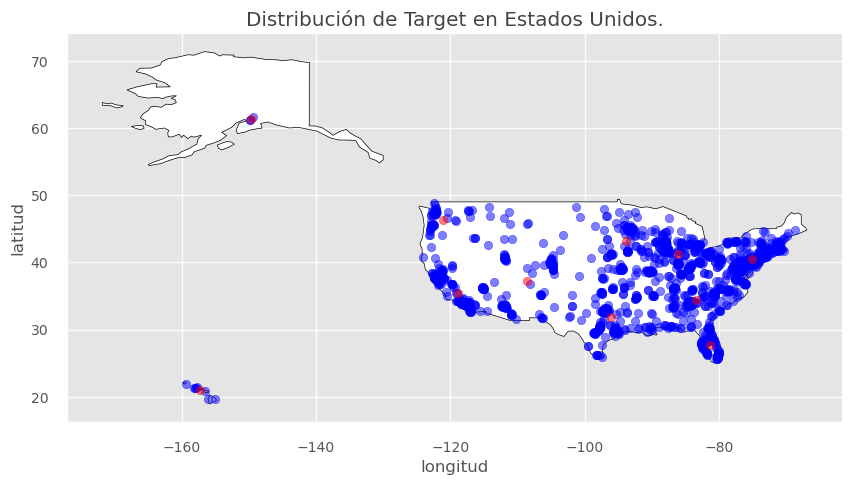

In [317]:
fig, gax = plt.subplots(figsize=(10,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

gdf.plot(ax=gax, color='blue', alpha = 0.5)
gdf1.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitud')
gax.set_ylabel('latitud')
gax.set_title('Distribución de Target en Estados Unidos.')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

Encuentra las latitudes y longitudes de los almacenes, ¿que ciudad es?, 

[41.29717588  -86.14997118]

Bourbon, Indiana
    ![](img.png)

[  35.41108603 -118.92569852]

Bakersfield, California
    ![](img_1.png)

[43.1137202   -93.88942837]
Municipio de Orthel, Iowa

[40.55199108  -75.07425605]

Municipio de Alexandria, Nueva Jersey
    ![](img_2.png)

[27.73898276  -81.35701207]

Indian Lake Estates, Florida
    ![](img_3.png)


[31.87654161  -96.13928996]
Fairfield, Texas

[46.25476682 -121.15506338]
Mount Adams, Washington
    ![](img_4.png)

[20.94542771 -157.31225085]

Honolulu, Hawái
    ![](img_5.png)

[37.2213025  -108.58490525]
Ute Mountain Reservation, Ute Mountain, Colorado
    ![](img_6.png)

[34.40976558  -83.45410842]
Banks County, Georgia
    ![](img_7.png)


[61.31264473 -149.6767927]
Anchorage School District, Anchorage, Alaska
    ![](img_8.png)


¿A cuantas tiendas va surtir?,

    En Hawai hay 8 tiendas, en Alaska son 3, hay 1838 tiendas en total menos 11 de Alaska y Hawaii,
    por lo tanto cada uno de los 9 almacentes del interior del territo atenderá aproximadamente 203 tiendas cada uno.

¿Sabes a que distancia estara?

    Aproximadamente cada almacén esta a 700 km, entonces cada almacen tendra un radio de operación aproximado de 350 Km.
    Excepto los de Alaska y hawaii los cuales estan muy cercanos entre ellos pero lejos de territorio nacional.

La siguiente imagen muestra la propuesta de almacen en alaska, a mitad del camino entre las tiendas.
![](img_9.png)

¿Cómo elegiste el número de almacenes?

    Para elegir el alpha se utiliza la grafica de codo, de 5 en delante la curva se mantiene mas estable.


Justifica tu respuesta técnicamente?

    Al crear los clusters, cuando se llega a 5 la suma de los errores empieza a mejorar, a partir de ahi existe un balance,
    por lo que aparentemente ya no se necesita aumentarlos, al utilizar la visualización en el mapa se nota que es correcta la distribución,
    pero no se proponen almacenes en Alaska y Hawaii, al aumentar a 10 se agregan 1 en Hawaii, y al llegar a 11 también se agrega uno para
    Alaska, por lo que decidí poner un alpha de 11.

¿Qué librerías nos pueden ayudar a graficar este tipo de datos?

    Geometry, Geopandas, Matplotlib, Shapely y las demás librerías de las que dependen.

¿Consideras importante que se grafique en un mapa?, ¿por qué?

    Sí, En este ejercicio no solo es importante sino que es la herramienta que nos ayuda a entender los datos y verificar el resultado.

Agrega las conclusiones

    El ejercicio ayuda a comprender la técnica K-means y su utilidad práctica, en un problema real, nos da un mejor entendimiento de
    donde se puede utilizar y las herramientas que tenemos al alcance para solucionar los problemas.
    En este caso los datos más útiles fueron las ubicaciones de las tiendas con su latitud y longitud para poder pintarlas en el mapa y
    así poder visualizarlas a detalle y su espaciamiento entre ellas y los puntos sugeridos para montar los almacenes.